In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv(r"..\Data\01_raw\transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions.shape

(83488, 3)

In [4]:
output = []

for column in transactions.columns:

    null_values  = np.sum(pd.isna(transactions[column]))
    unique = transactions[column].nunique()
    column_data_type = transactions[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = transactions.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
date,0,1682,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,0,4993,int64,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [5]:
transactions.drop_duplicates(inplace=True)

In [6]:
transactions.shape

(83488, 3)

<Axes: ylabel='transactions'>

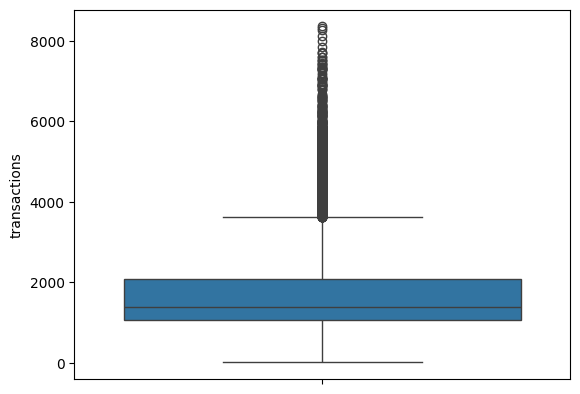

In [7]:
sns.boxplot(y=transactions['transactions'] )

([<matplotlib.axis.XTick at 0x192d1f16b90>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

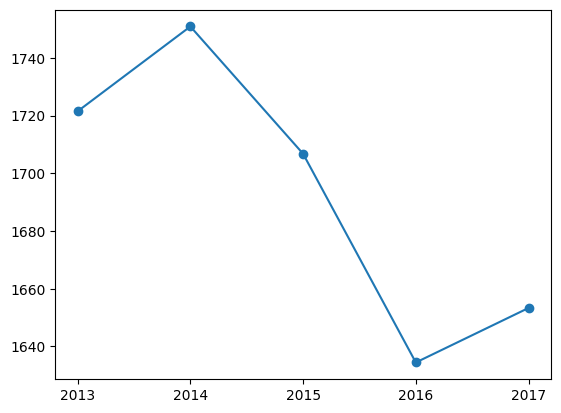

In [8]:
transactions['year'] = pd.DatetimeIndex(transactions['date']).year

yearly_data = transactions.groupby('year')['transactions'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['transactions'], marker='o')

plt.xticks(range(2013, 2018))